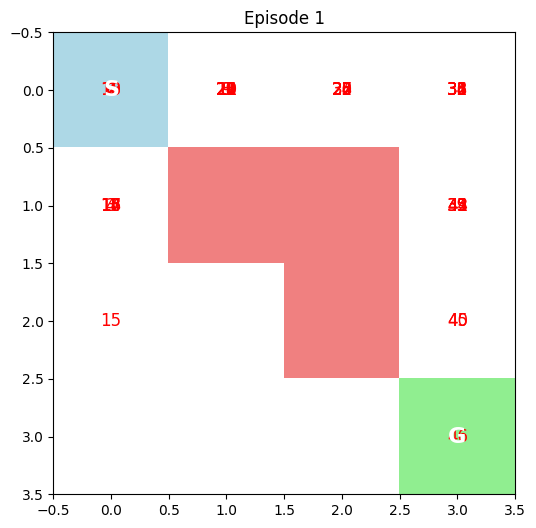

Episode 1 finished.


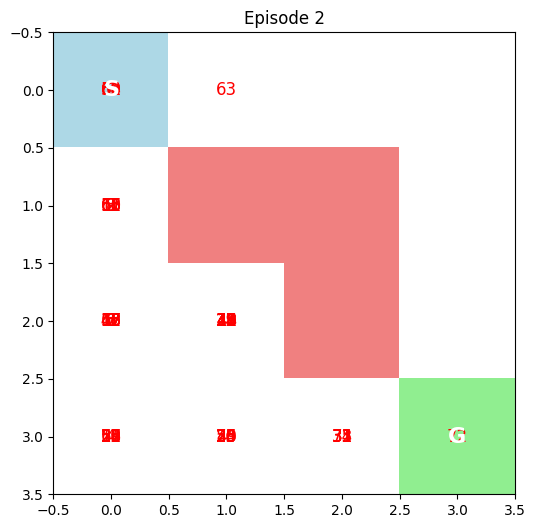

Episode 2 finished.


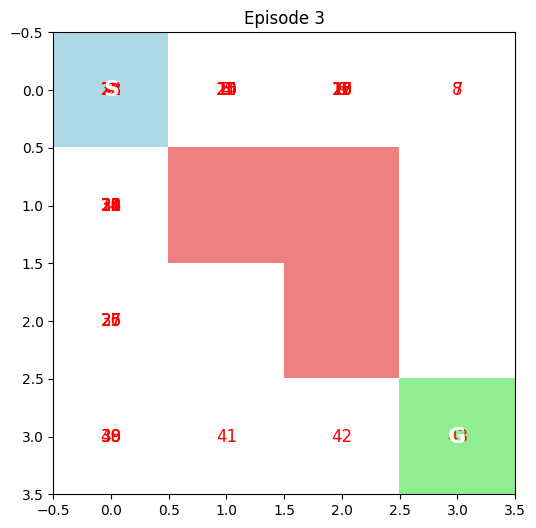

Episode 3 finished.


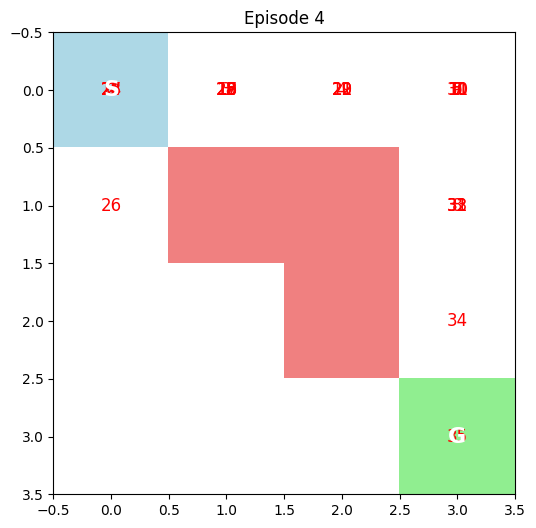

Episode 4 finished.


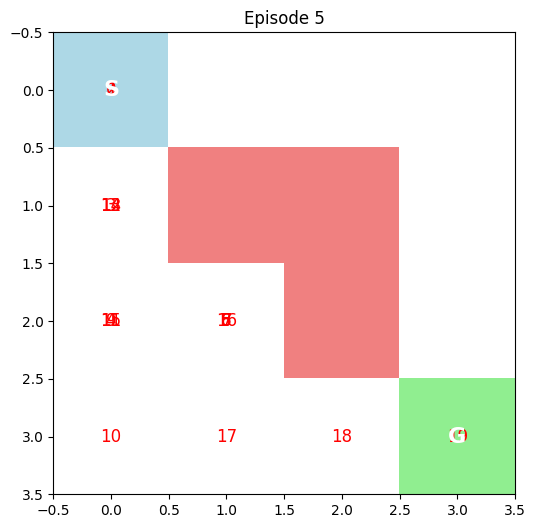

Episode 5 finished.


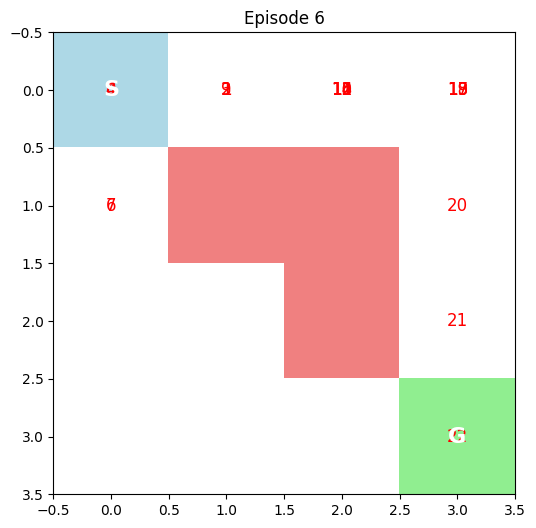

Episode 6 finished.


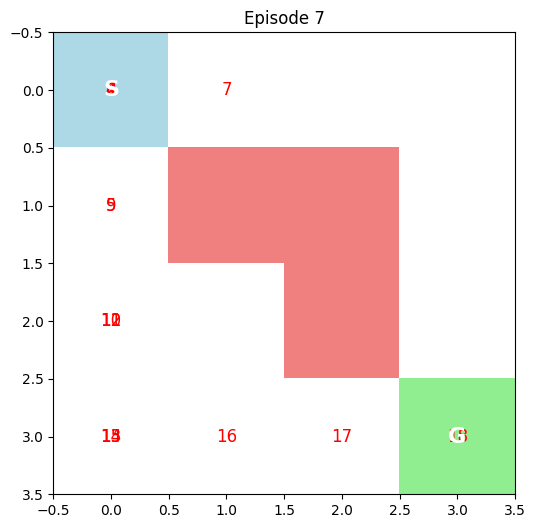

Episode 7 finished.


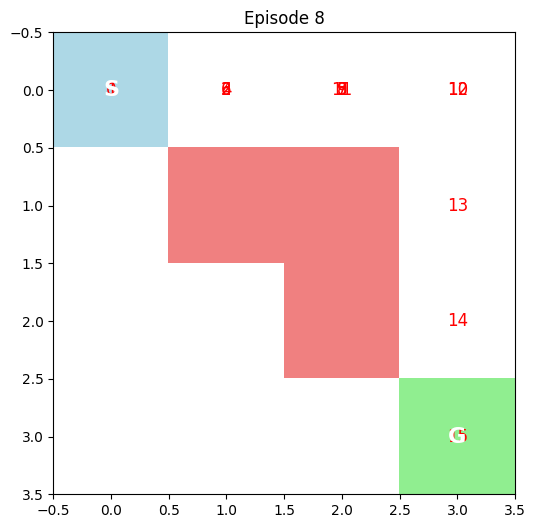

Episode 8 finished.


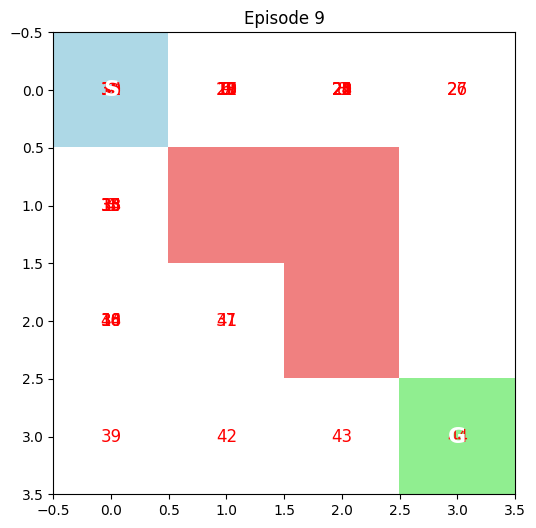

Episode 9 finished.


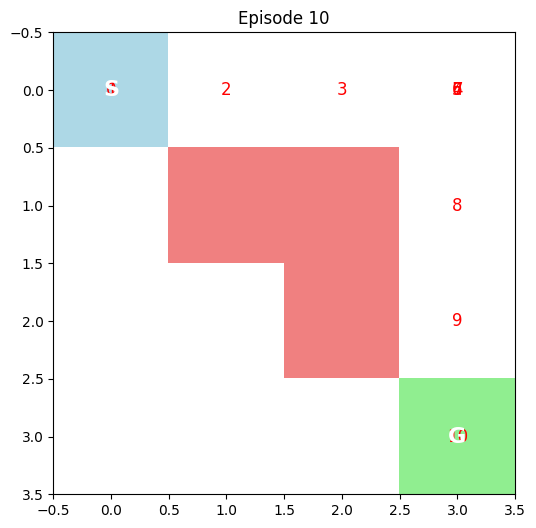

Episode 10 finished.


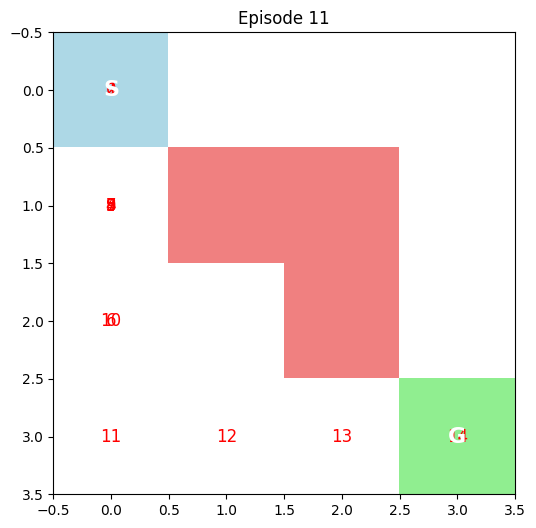

Episode 11 finished.


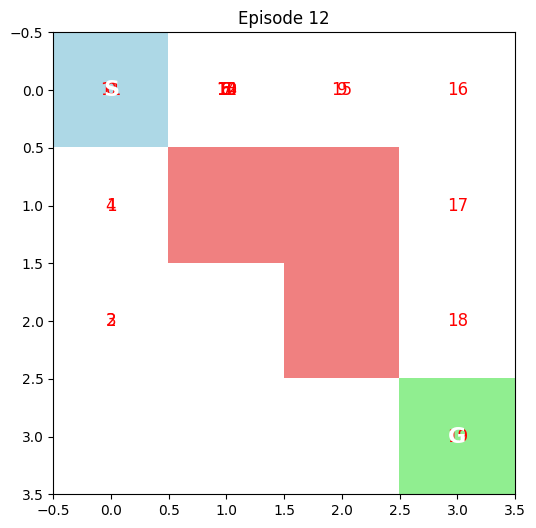

Episode 12 finished.


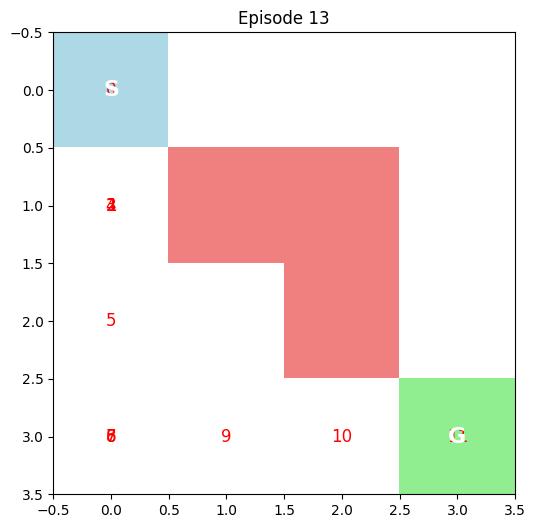

Episode 13 finished.


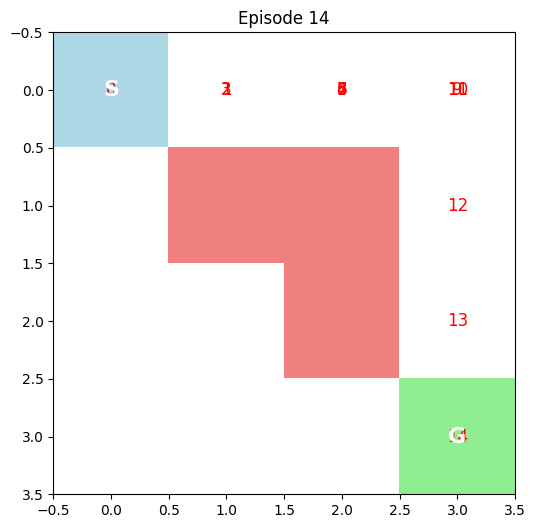

Episode 14 finished.


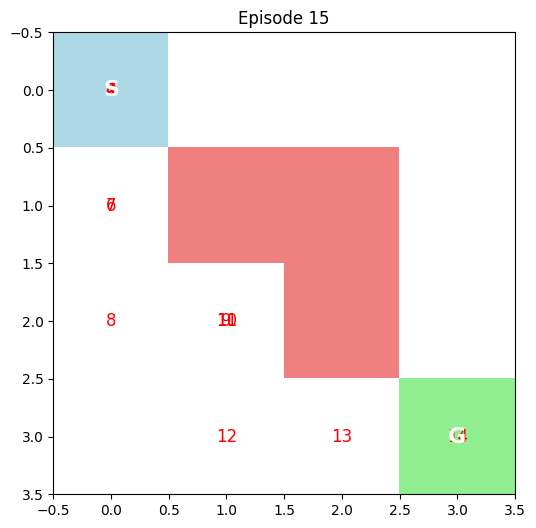

Episode 15 finished.


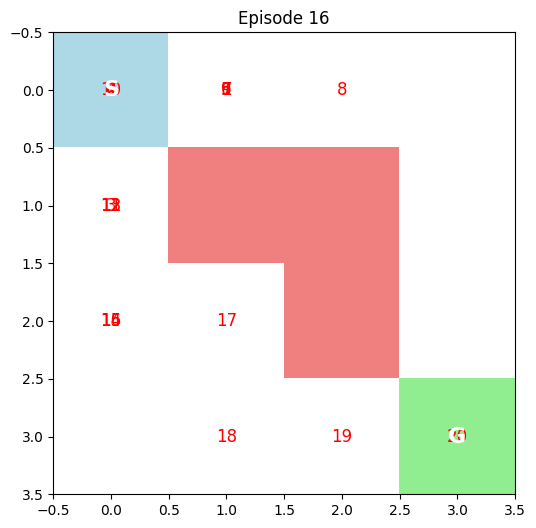

Episode 16 finished.


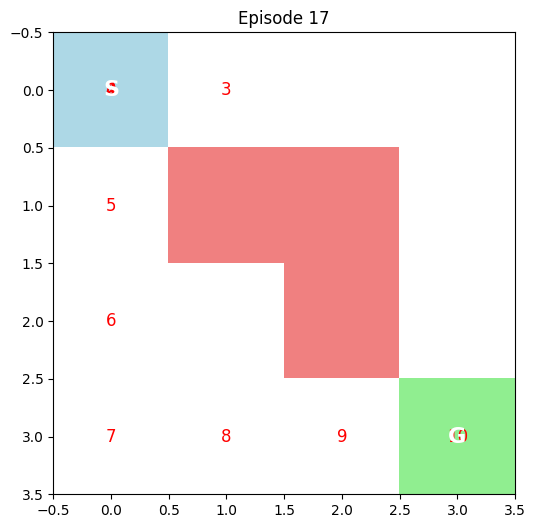

Episode 17 finished.


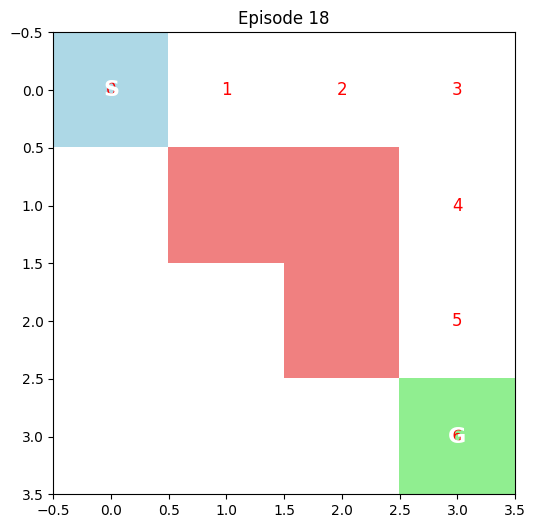

Episode 18 finished.


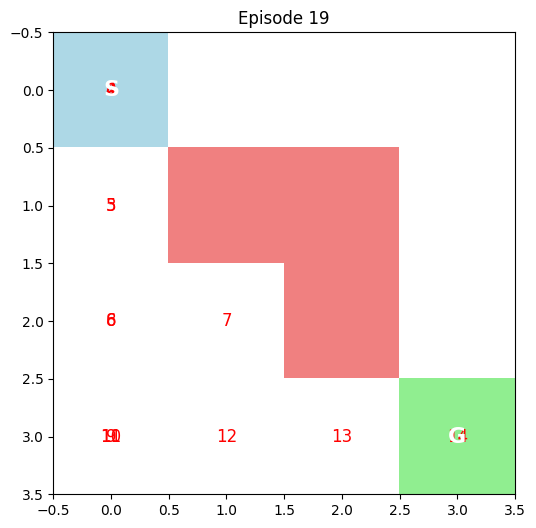

Episode 19 finished.


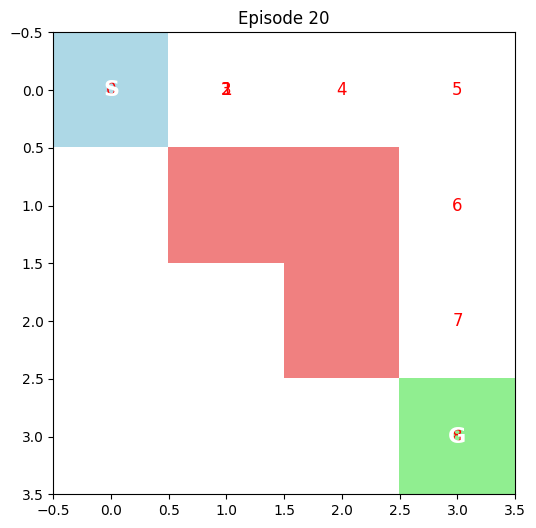

Episode 20 finished.


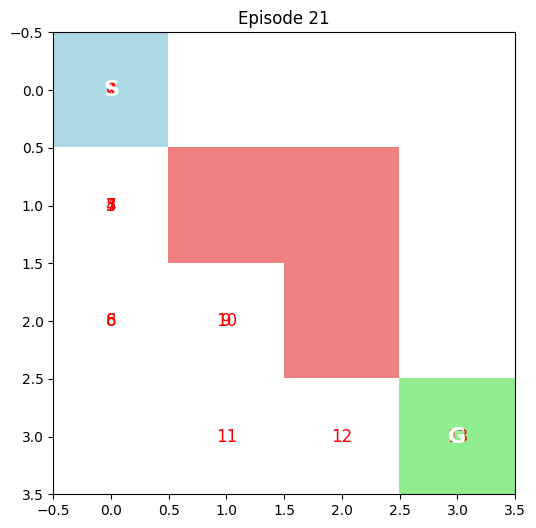

Episode 21 finished.


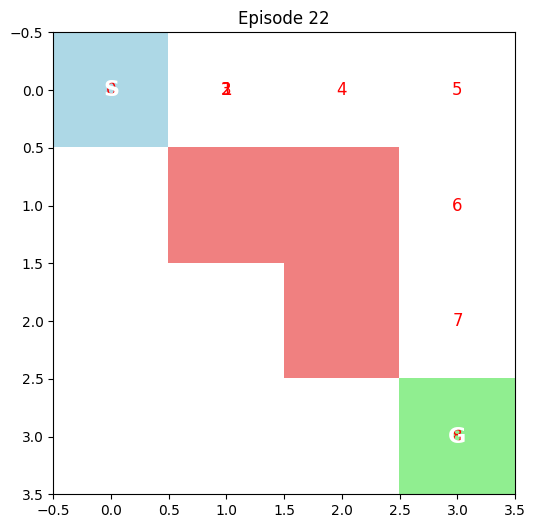

Episode 22 finished.


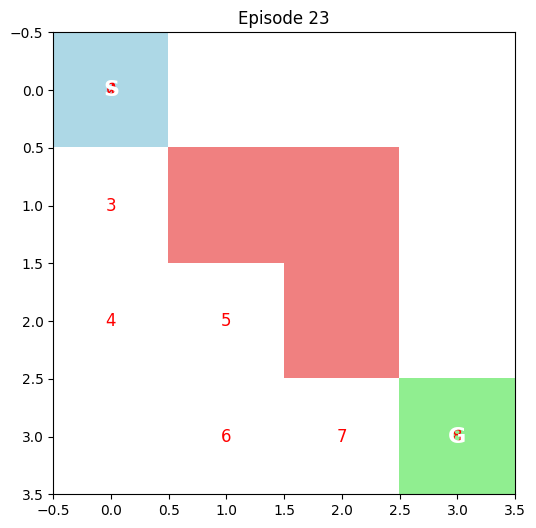

Episode 23 finished.


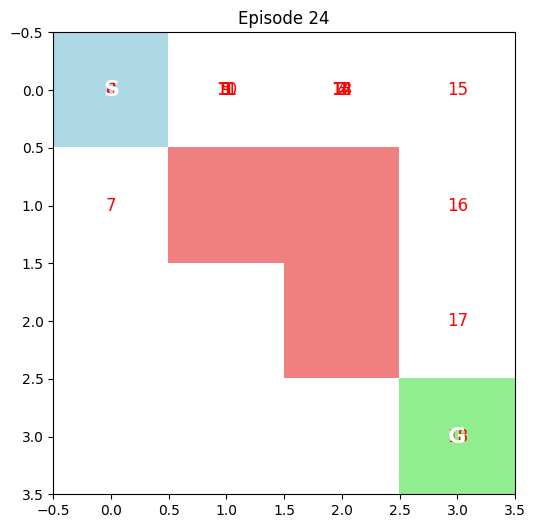

Episode 24 finished.


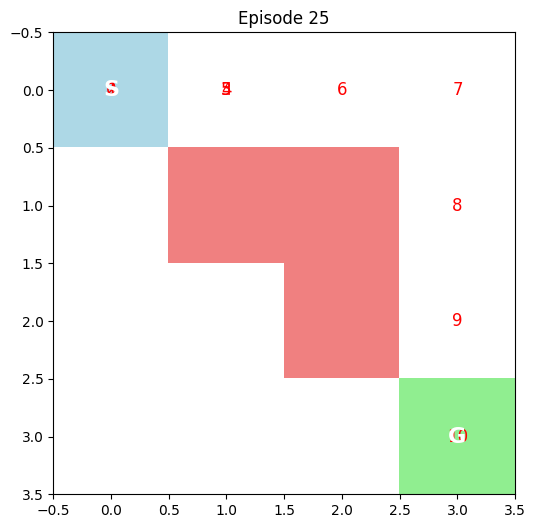

Episode 25 finished.


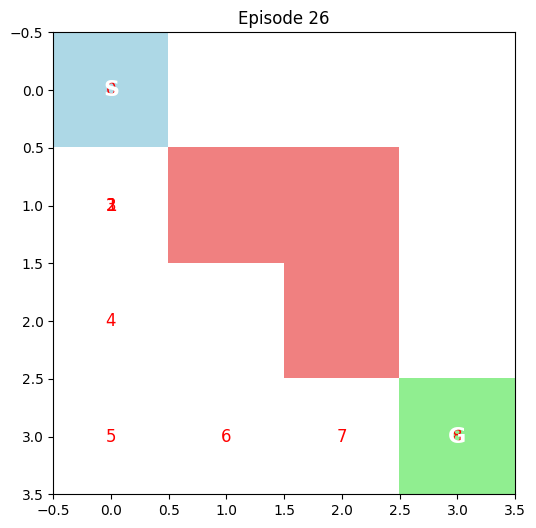

Episode 26 finished.


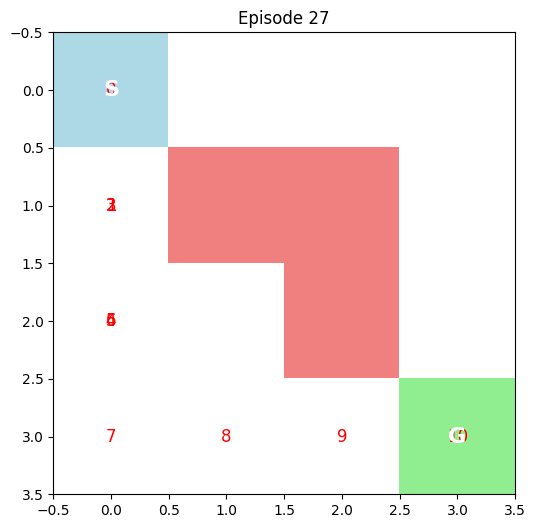

Episode 27 finished.


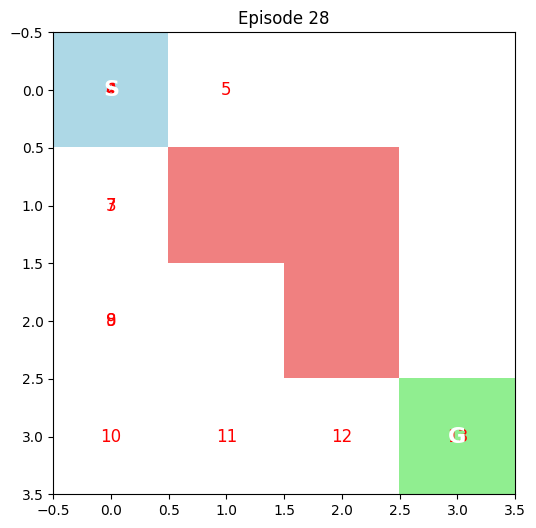

Episode 28 finished.


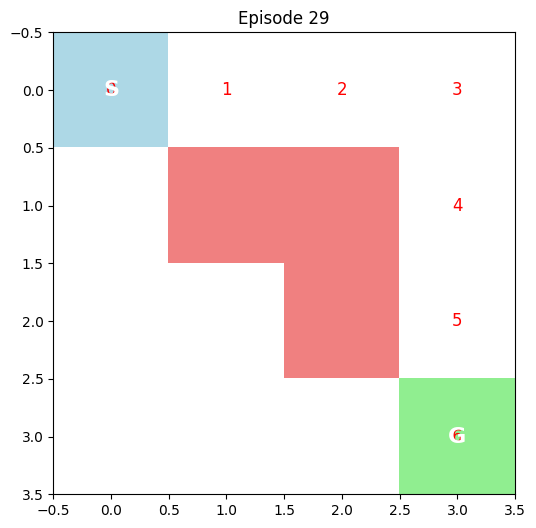

Episode 29 finished.


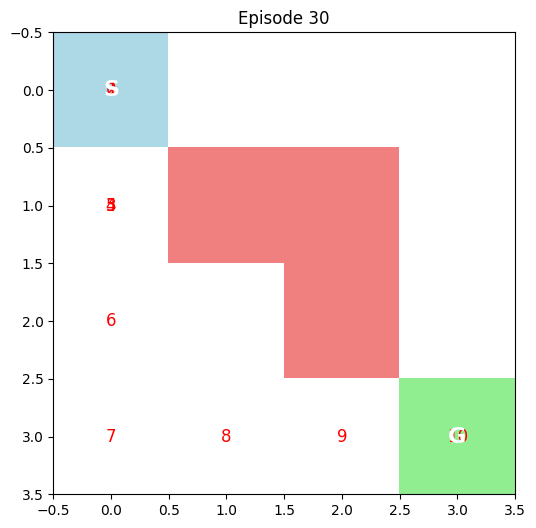

Episode 30 finished.


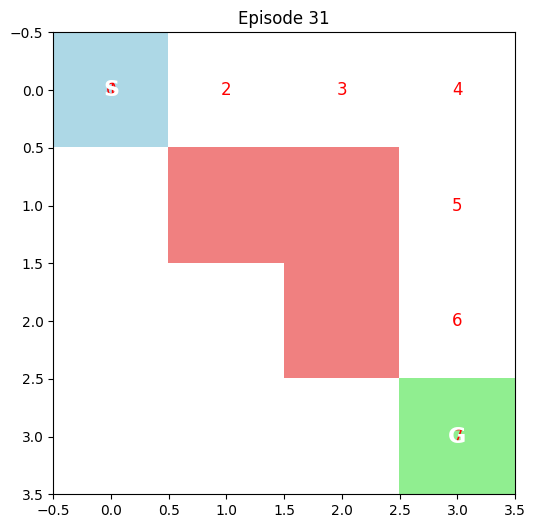

Episode 31 finished.


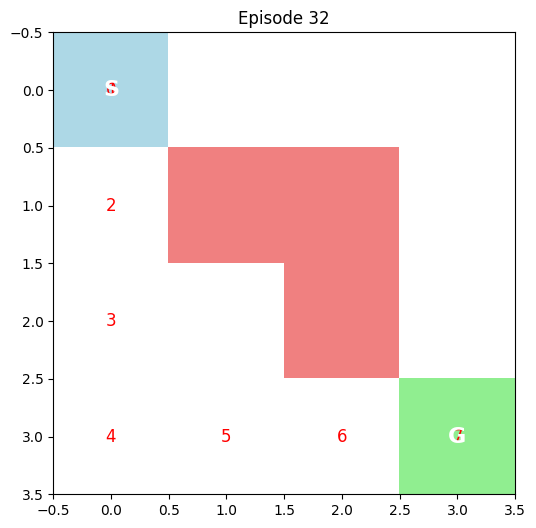

Episode 32 finished.


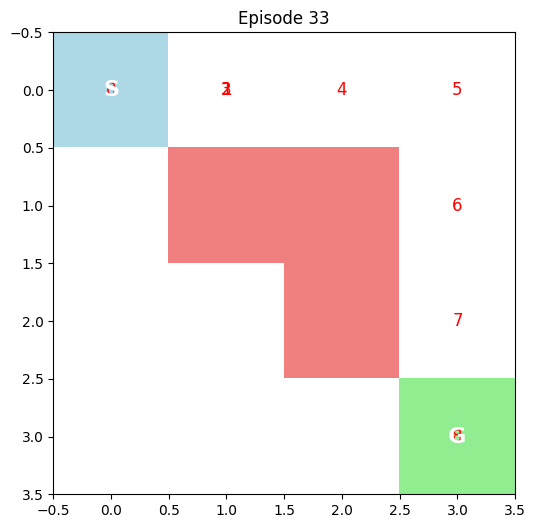

Episode 33 finished.


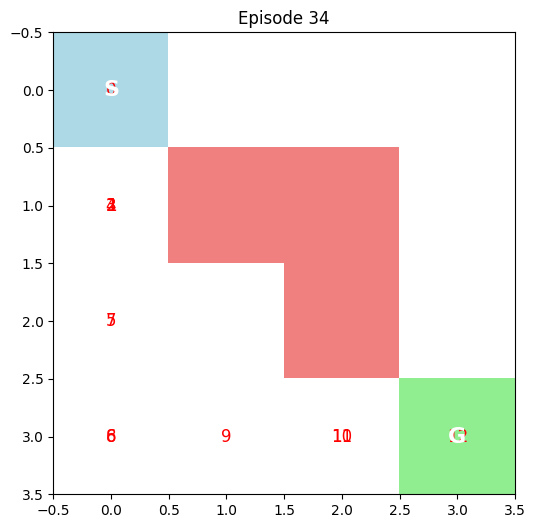

Episode 34 finished.


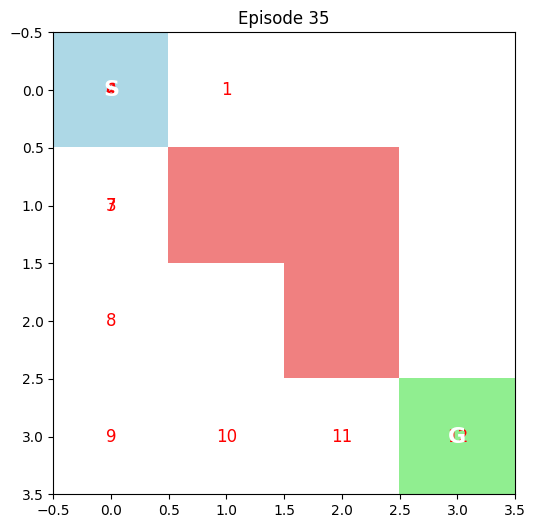

Episode 35 finished.


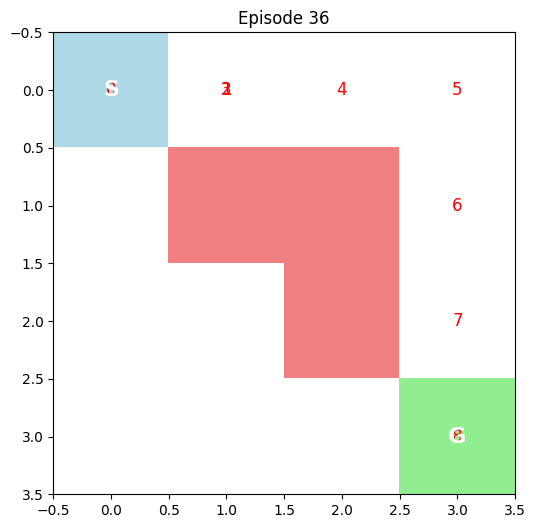

Episode 36 finished.


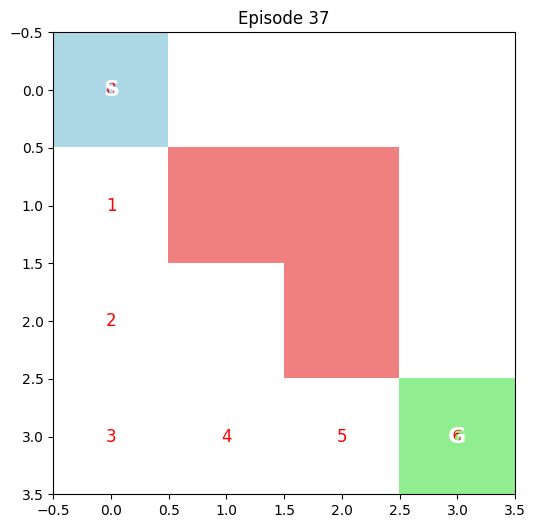

Episode 37 finished.


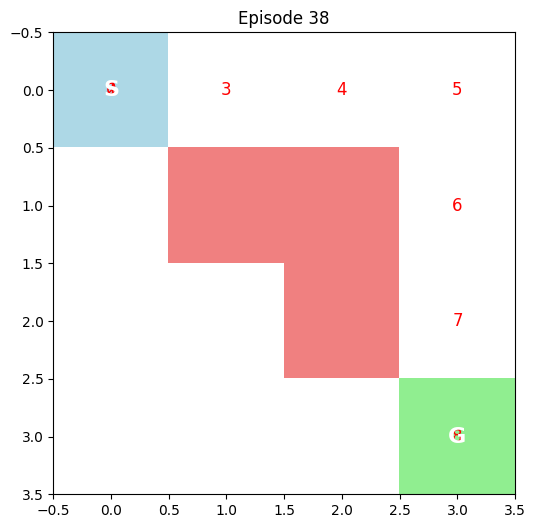

Episode 38 finished.


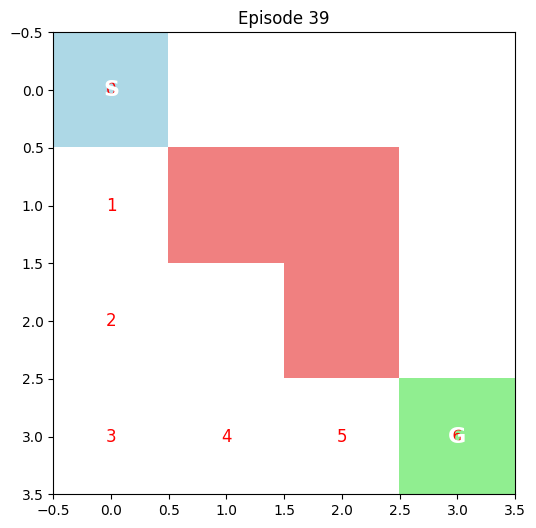

Episode 39 finished.


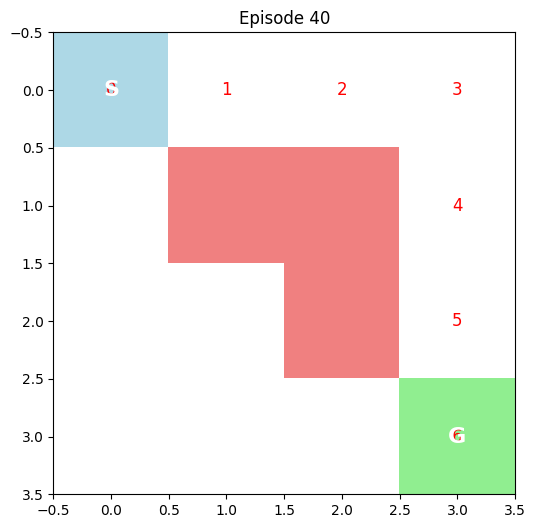

Episode 40 finished.


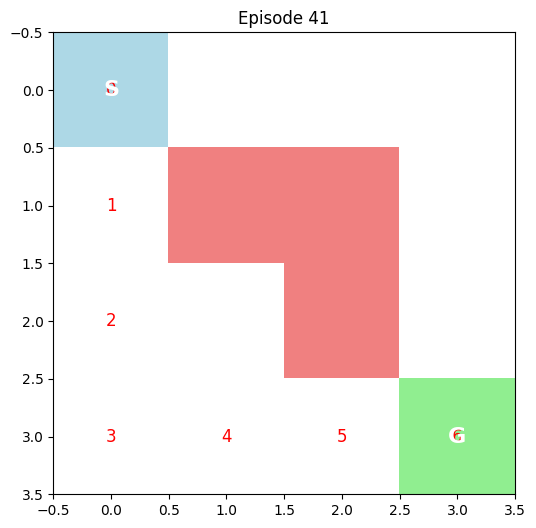

Episode 41 finished.


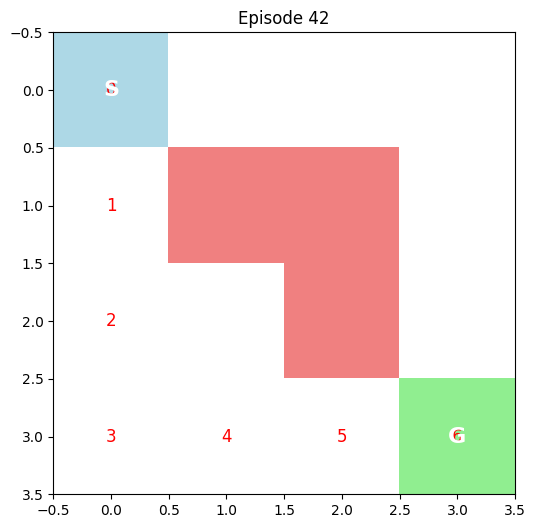

Episode 42 finished.


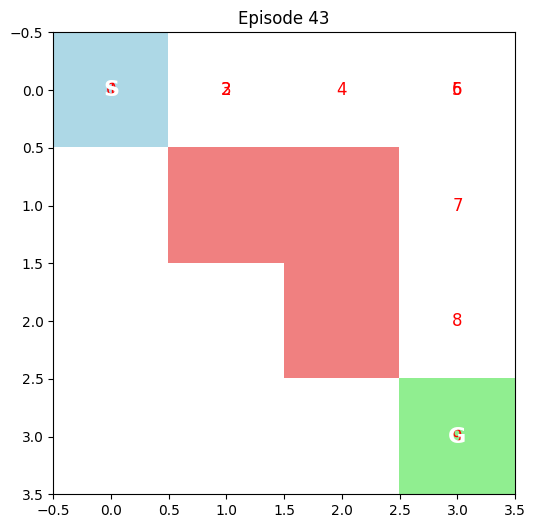

Episode 43 finished.


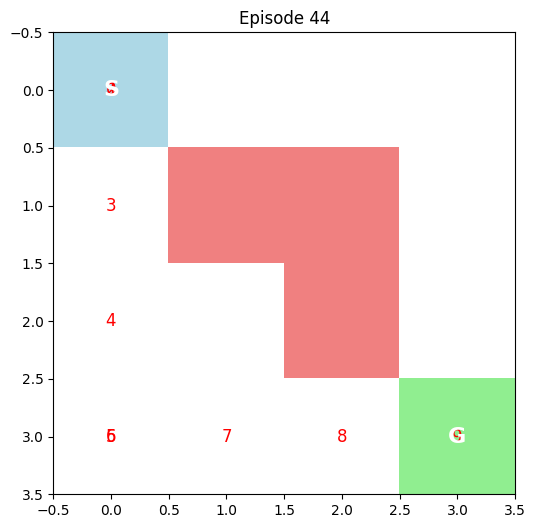

Episode 44 finished.


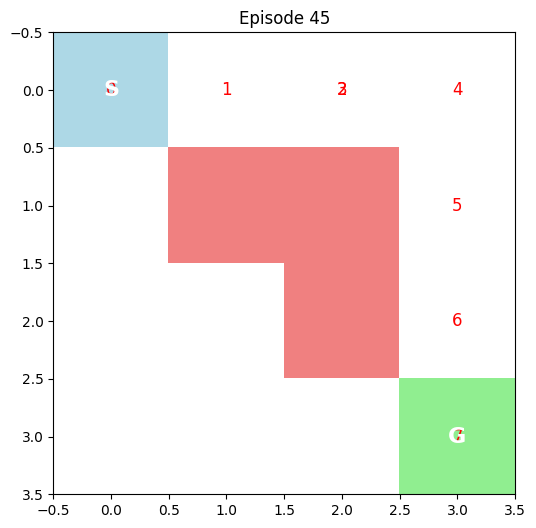

Episode 45 finished.


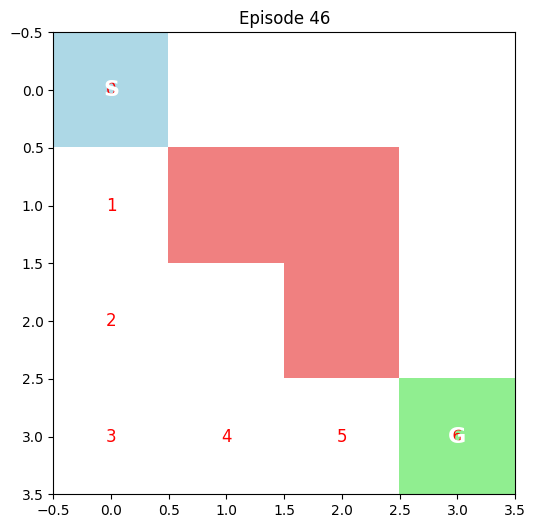

Episode 46 finished.


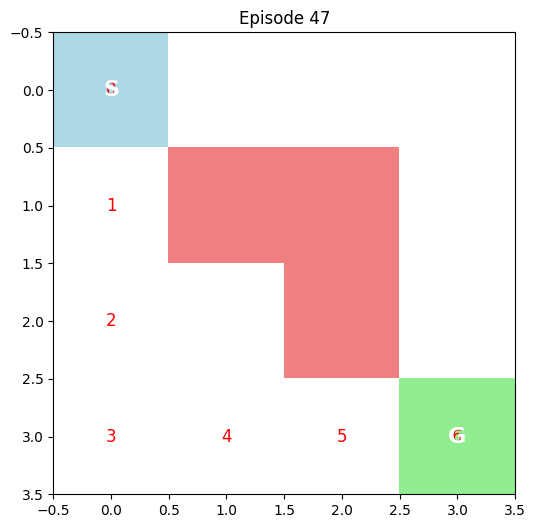

Episode 47 finished.


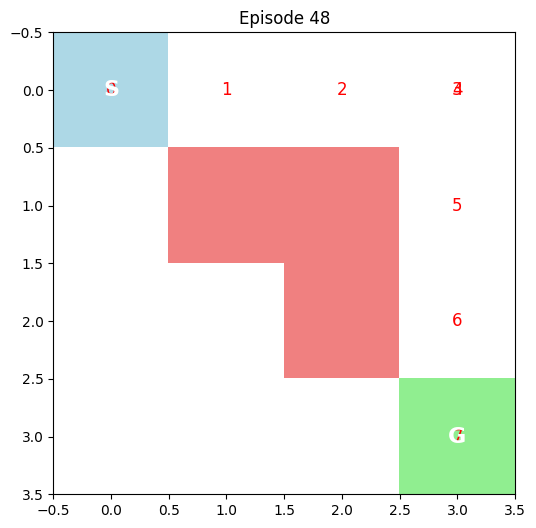

Episode 48 finished.


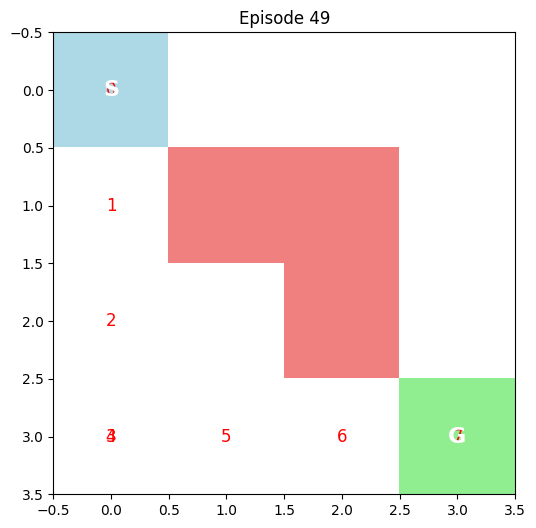

Episode 49 finished.


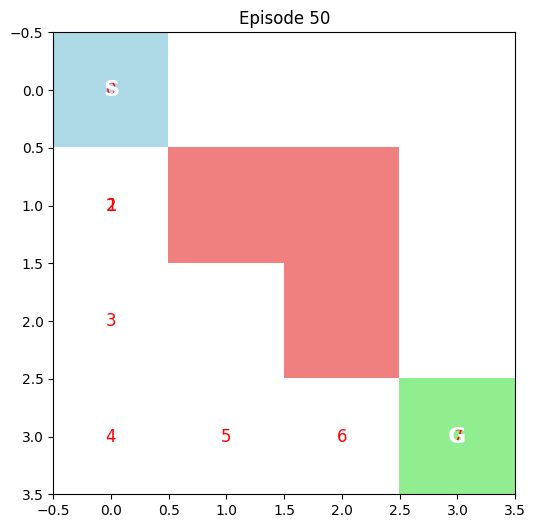

Episode 50 finished.


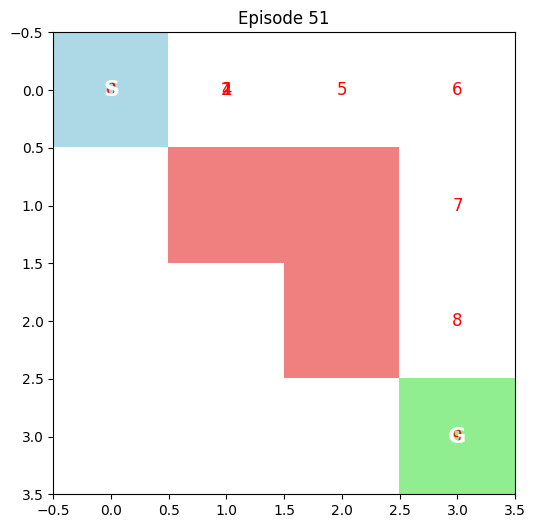

Episode 51 finished.


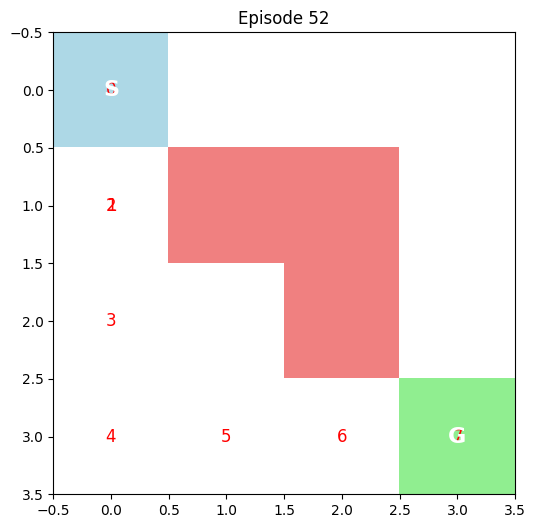

Episode 52 finished.


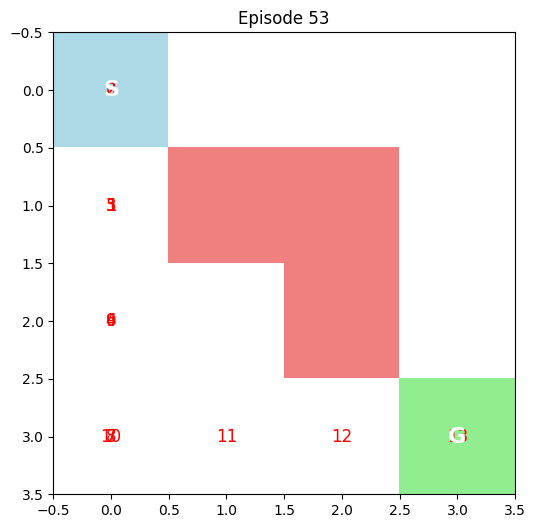

Episode 53 finished.


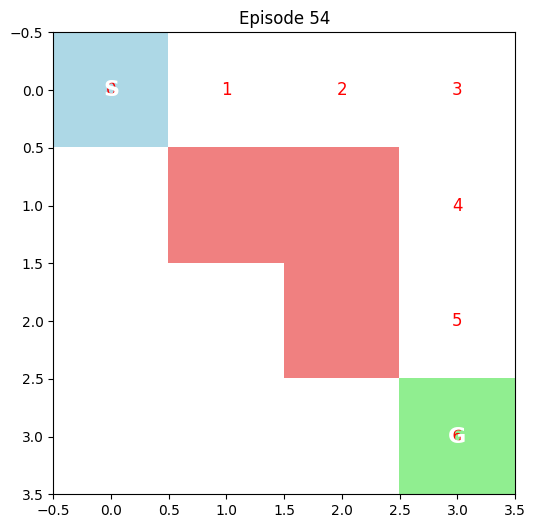

Episode 54 finished.


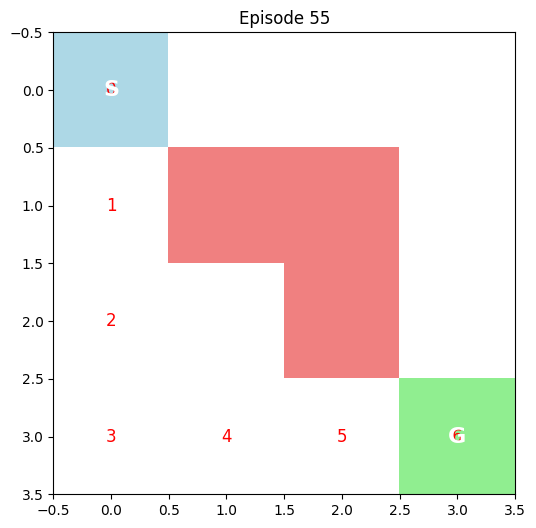

Episode 55 finished.


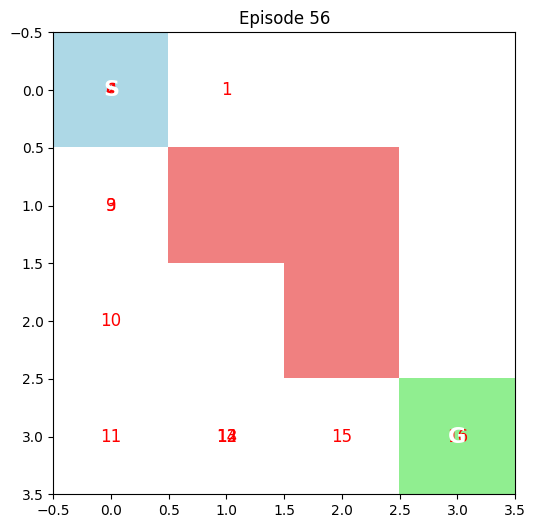

Episode 56 finished.


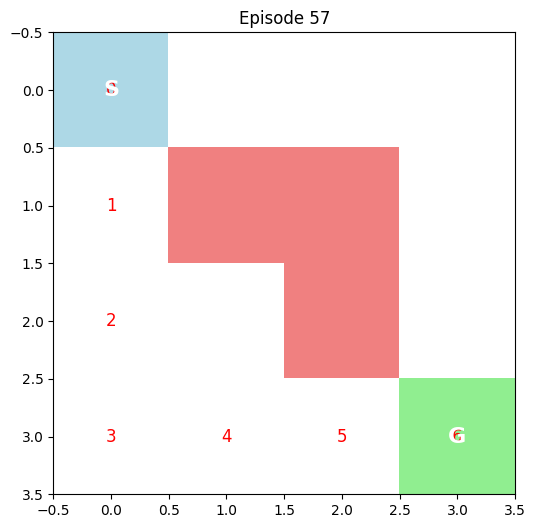

Episode 57 finished.


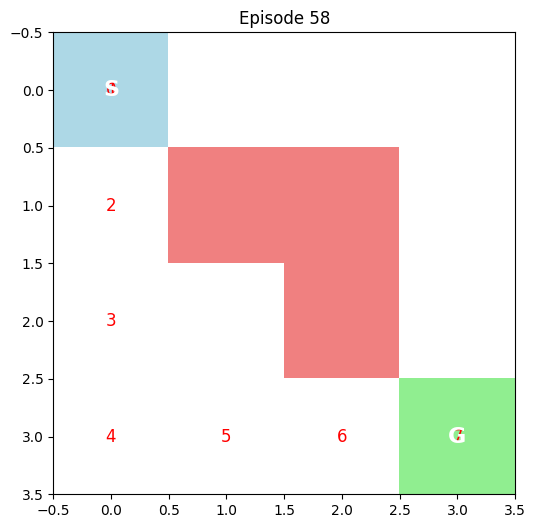

Episode 58 finished.


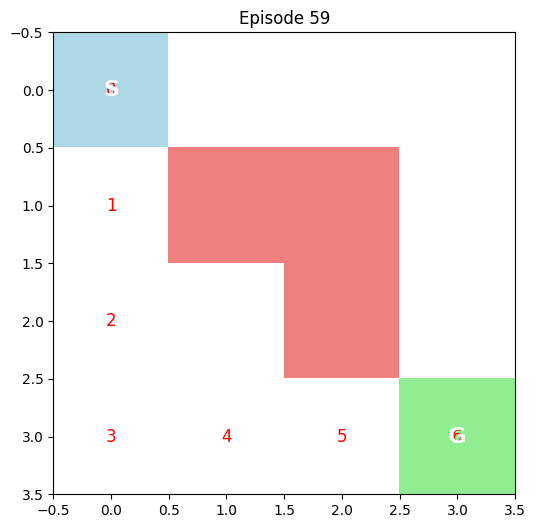

Episode 59 finished.


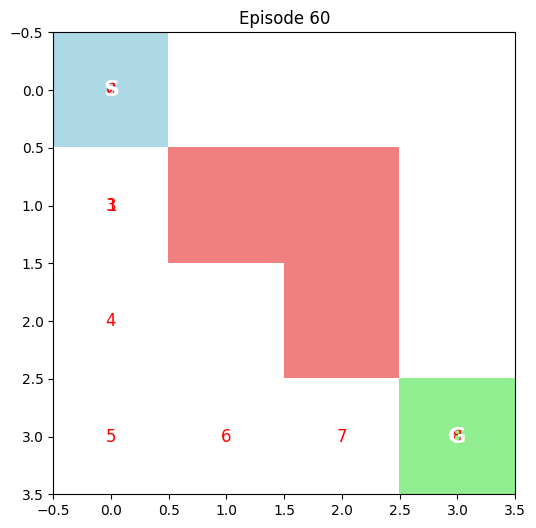

Episode 60 finished.


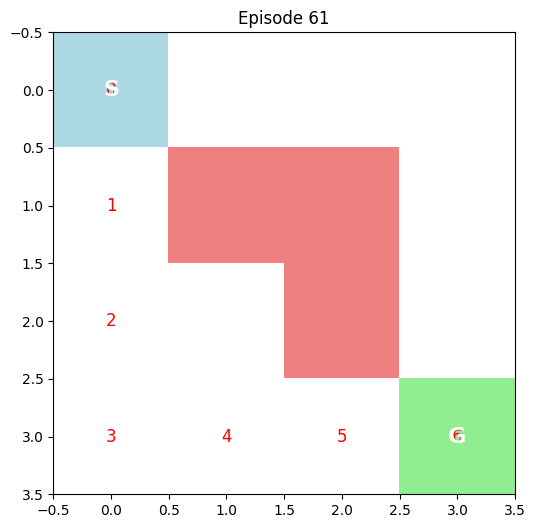

Episode 61 finished.


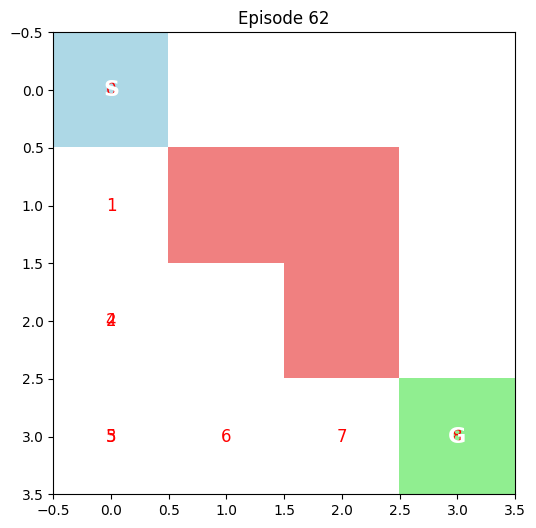

Episode 62 finished.


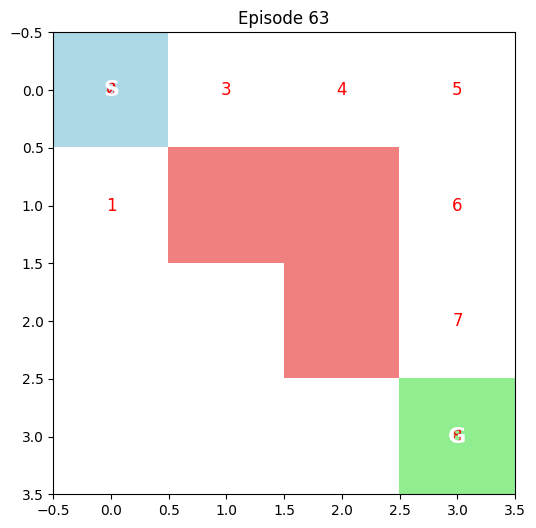

Episode 63 finished.


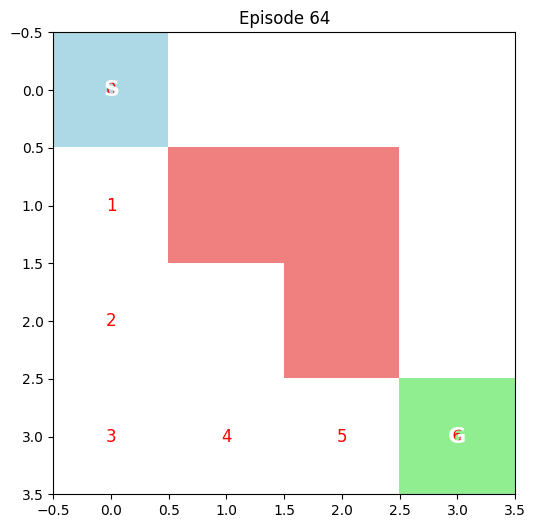

Episode 64 finished.


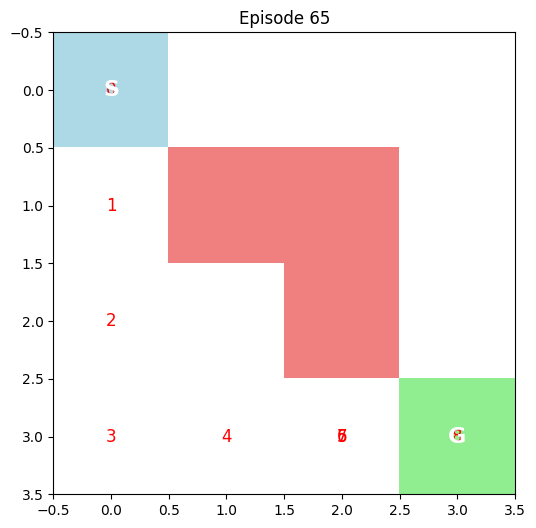

Episode 65 finished.


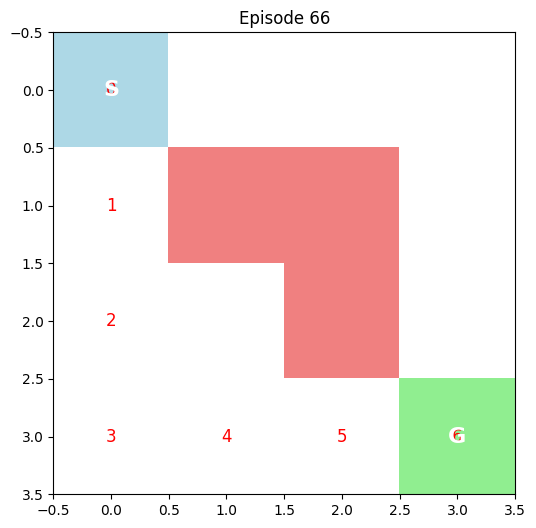

Episode 66 finished.


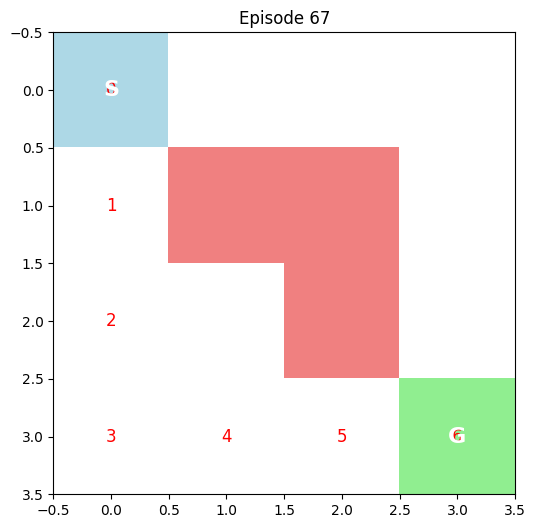

Episode 67 finished.


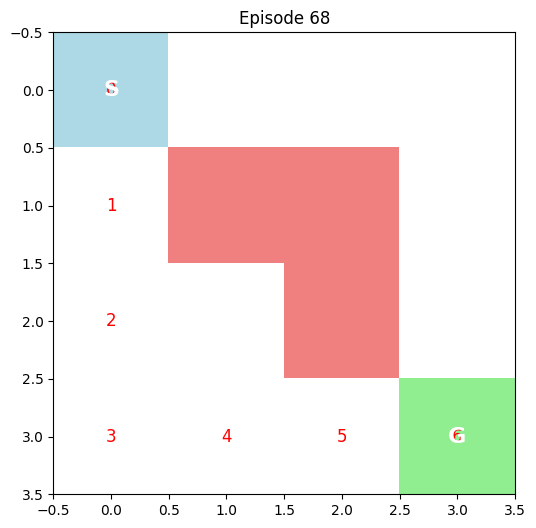

Episode 68 finished.


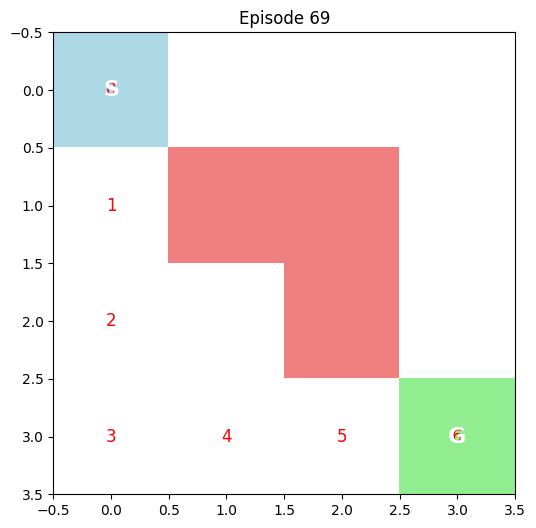

Episode 69 finished.


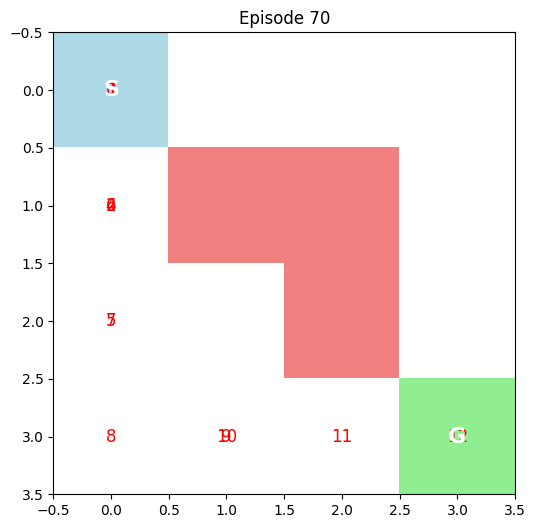

Episode 70 finished.


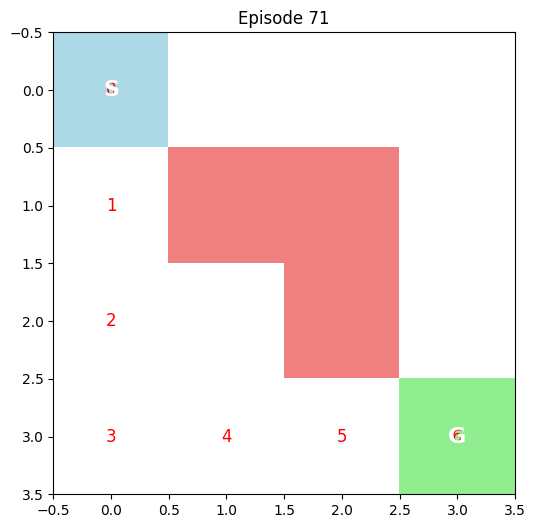

Episode 71 finished.


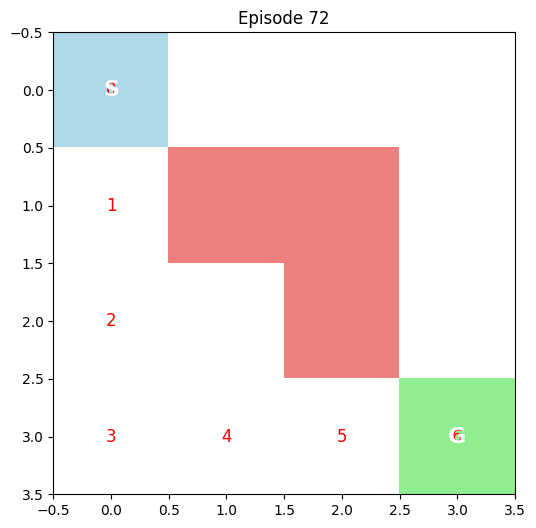

Episode 72 finished.


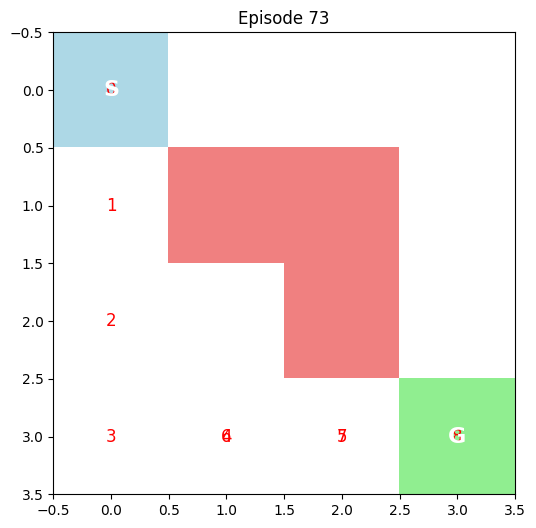

Episode 73 finished.


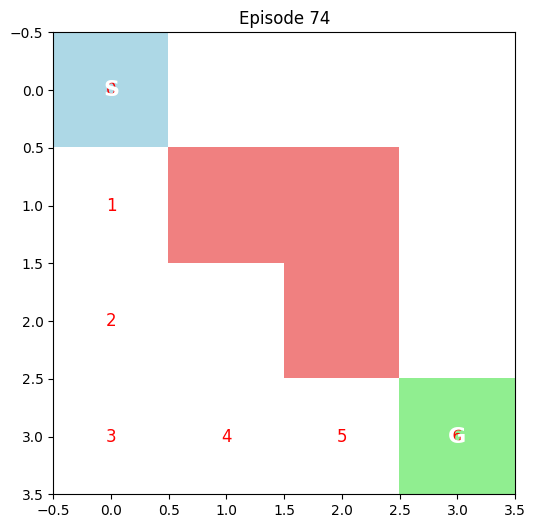

Episode 74 finished.


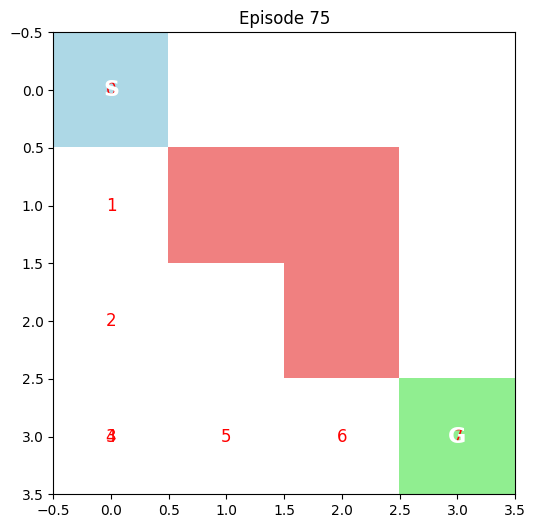

Episode 75 finished.


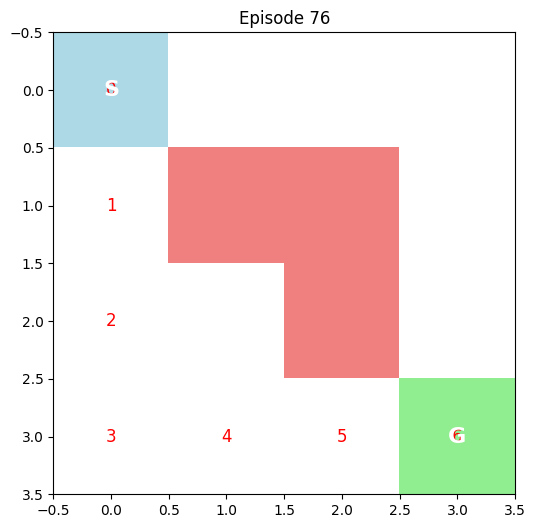

Episode 76 finished.


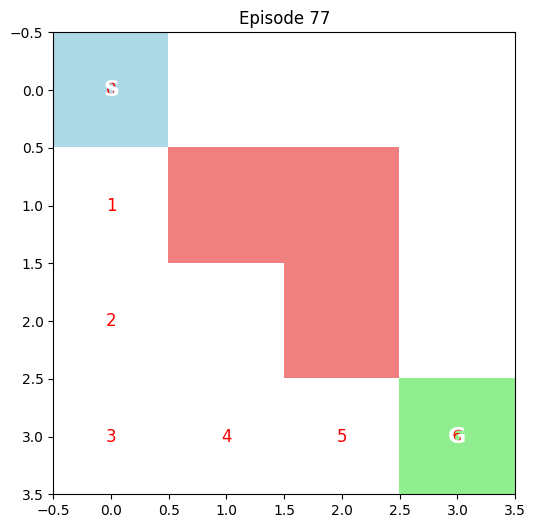

Episode 77 finished.


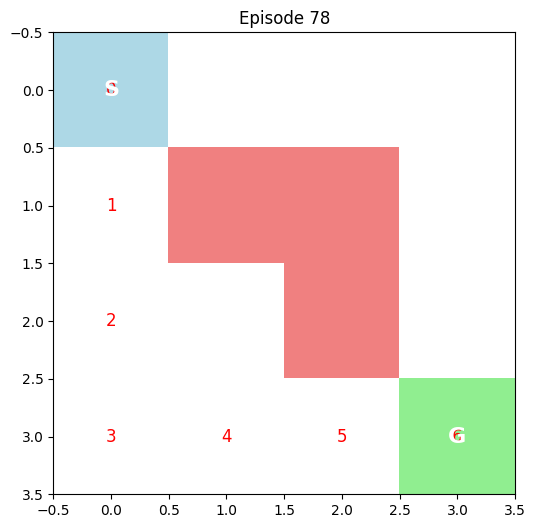

Episode 78 finished.


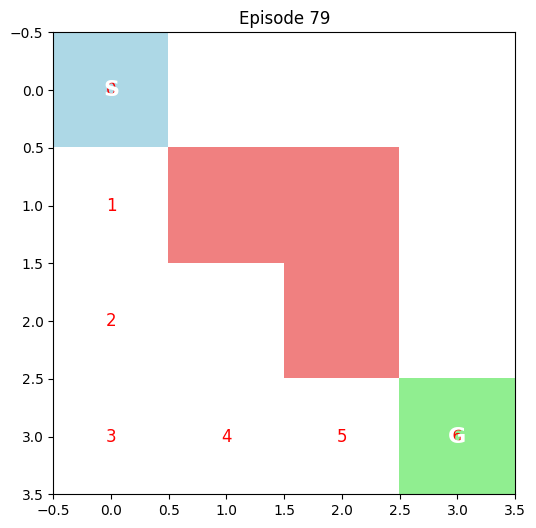

Episode 79 finished.


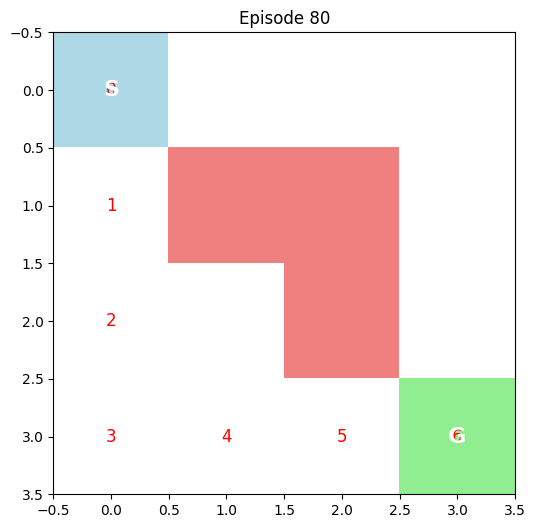

Episode 80 finished.


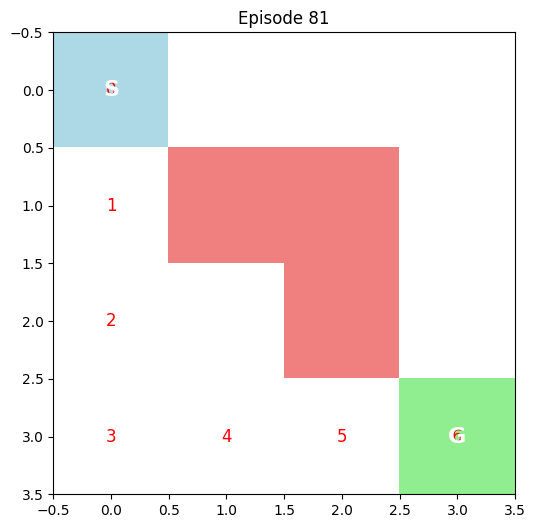

Episode 81 finished.


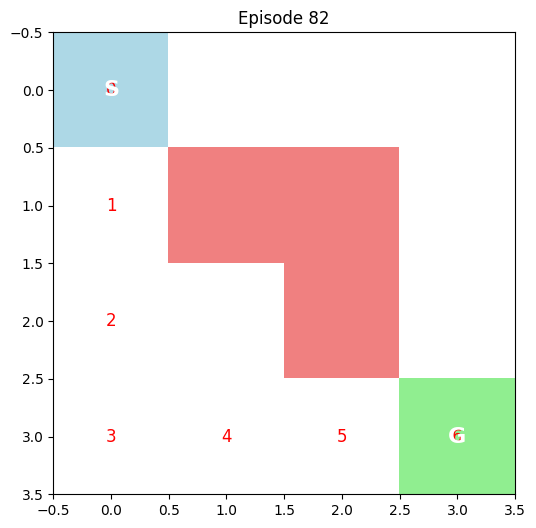

Episode 82 finished.


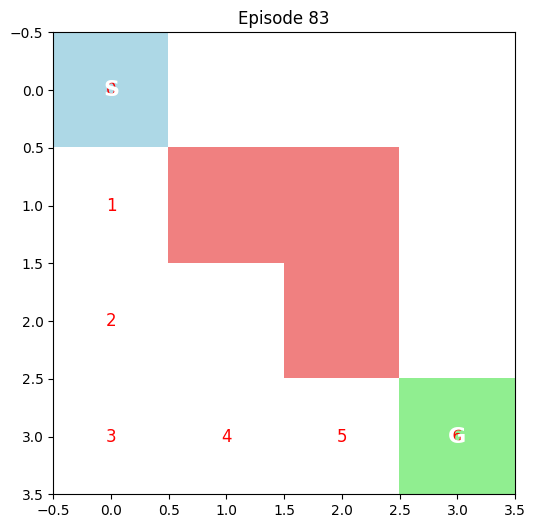

Episode 83 finished.


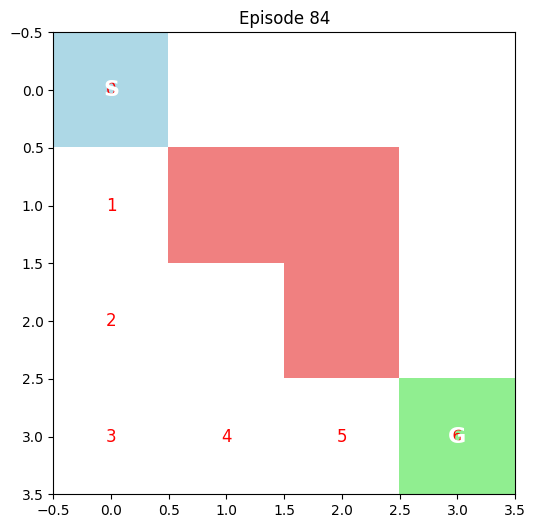

Episode 84 finished.


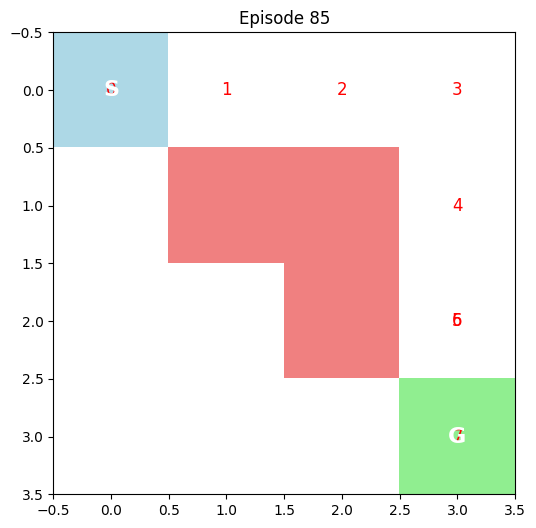

Episode 85 finished.


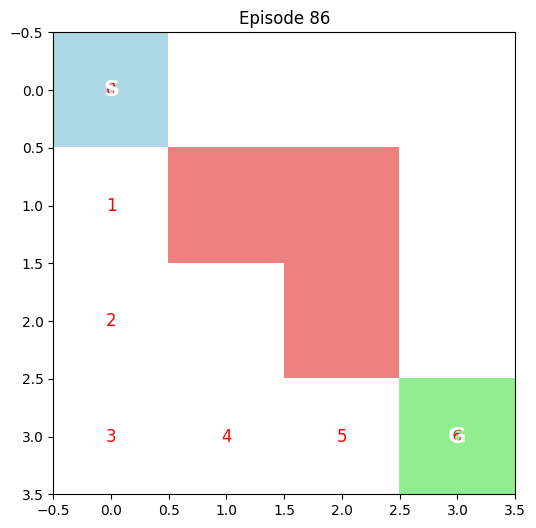

Episode 86 finished.


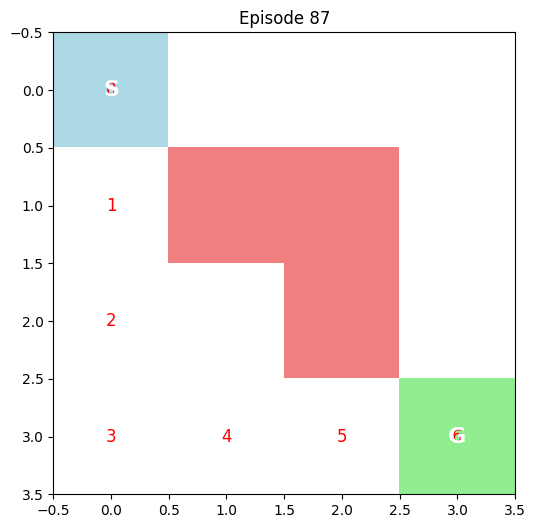

Episode 87 finished.


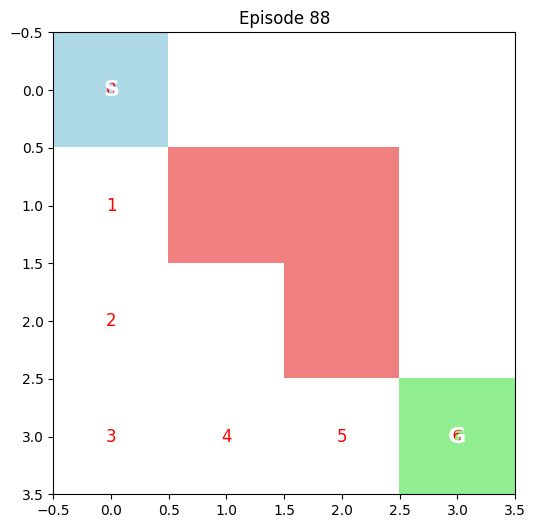

Episode 88 finished.


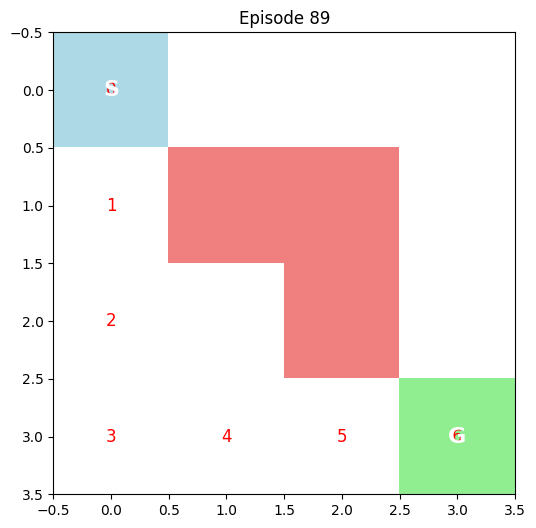

Episode 89 finished.


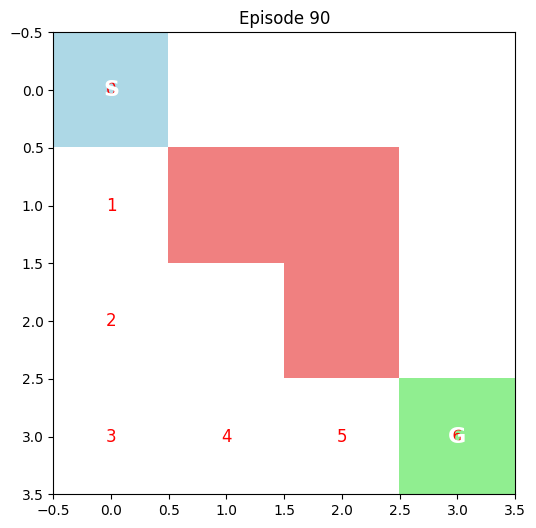

Episode 90 finished.


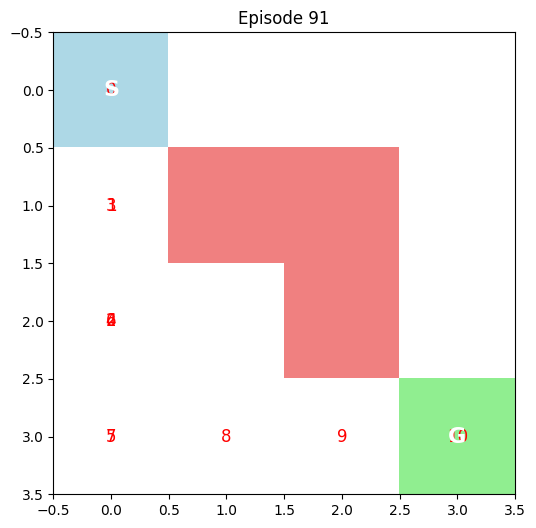

Episode 91 finished.


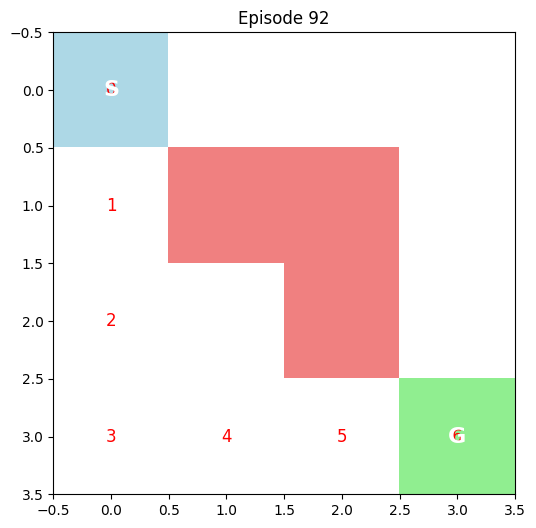

Episode 92 finished.


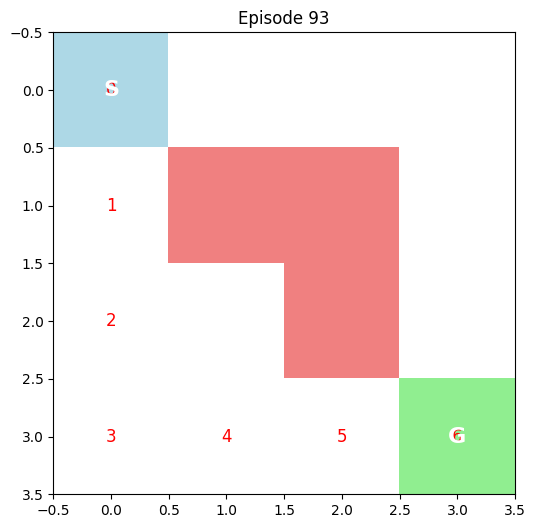

Episode 93 finished.


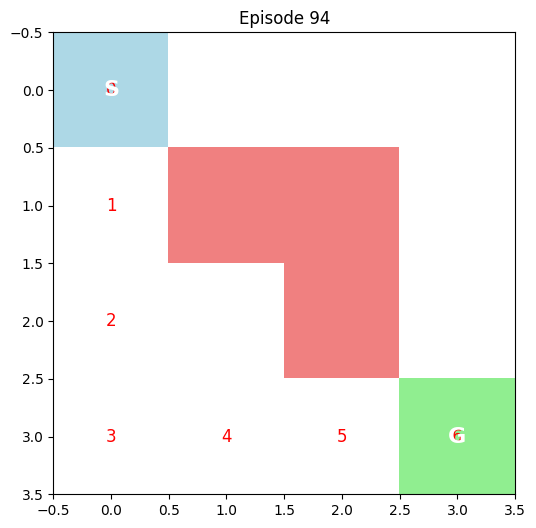

Episode 94 finished.


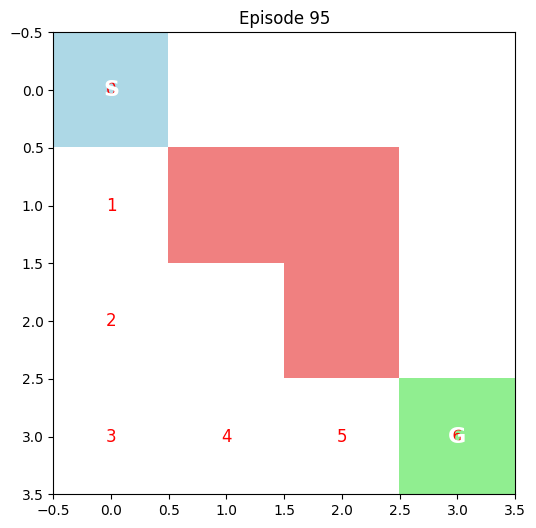

Episode 95 finished.


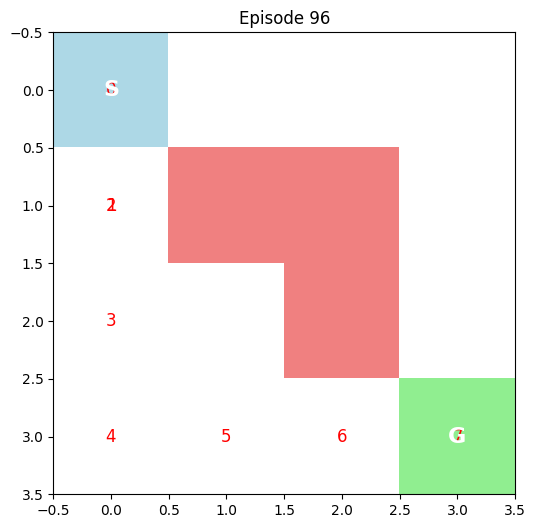

Episode 96 finished.


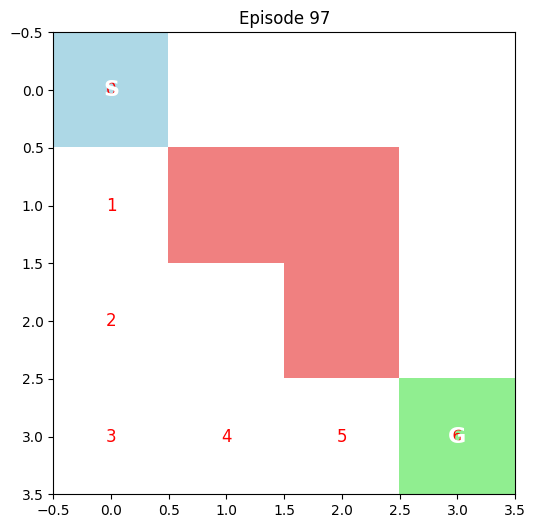

Episode 97 finished.


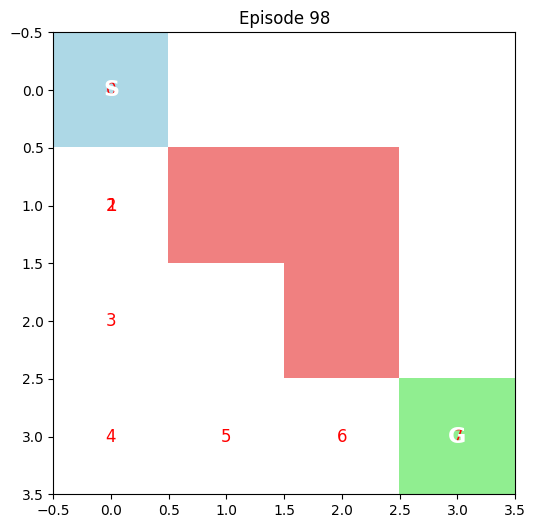

Episode 98 finished.


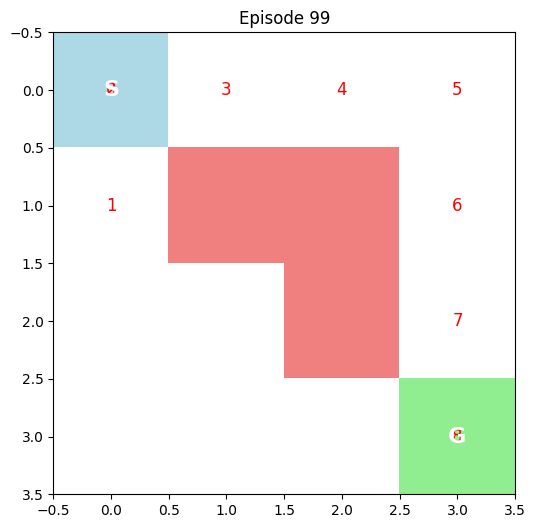

Episode 99 finished.


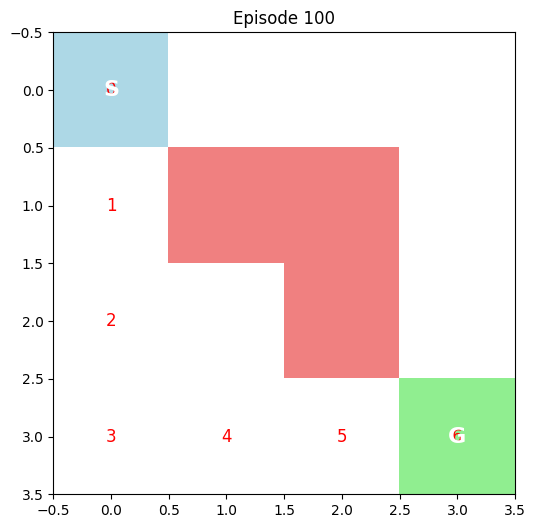

Episode 100 finished.


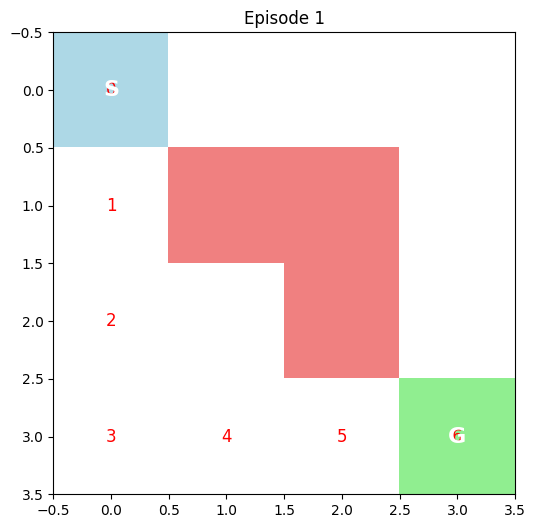

Path 1: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)]


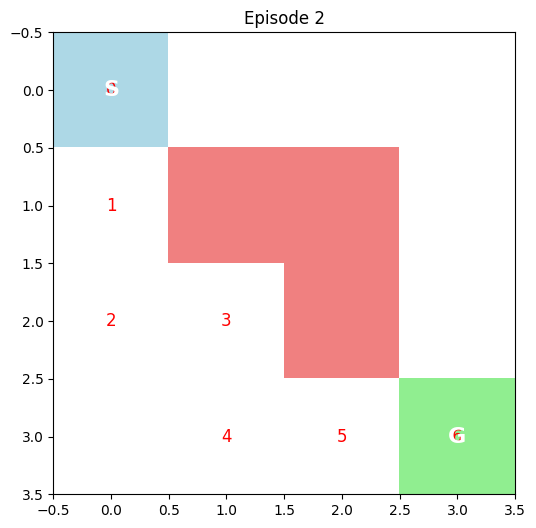

Path 2: [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (3, 3)]


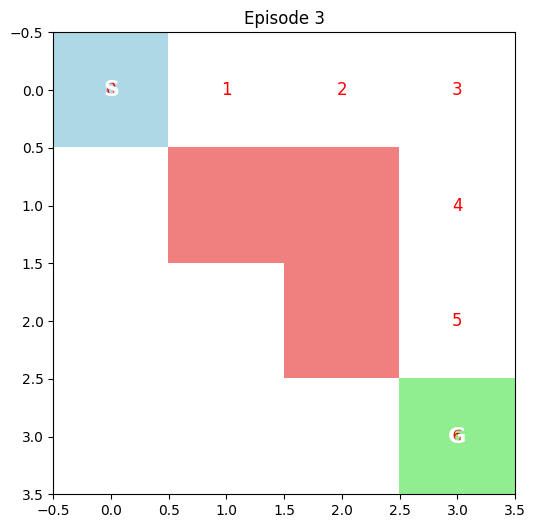

Path 3: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
Step 1: Move down, Current State: (1, 0)
Step 2: Move down, Current State: (2, 0)
Step 3: Move down, Current State: (3, 0)
Step 4: Move right, Current State: (3, 1)
Step 5: Move right, Current State: (3, 2)
Step 6: Move right, Current State: (3, 3)
Goal reached in 6 steps!


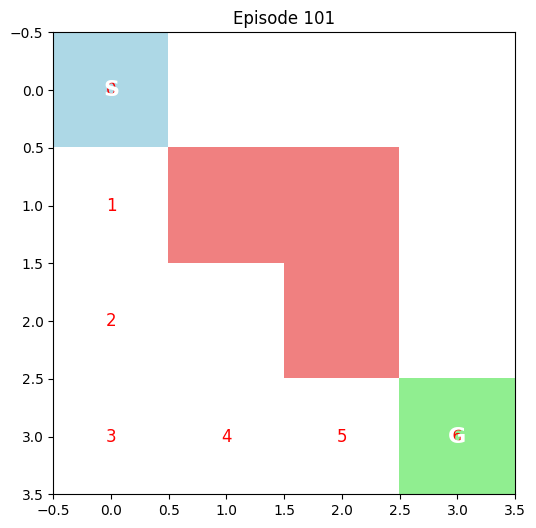

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the Maze as a 4x4 grid
# 0 - Free space, 1 - Obstacle, 2 - Start, 3 - Goal
maze_layout = [
    [2, 0, 0, 0],  # No obstacles in the first row
    [0, 1, 1, 0],  # # = Obstacle
    [0, 0, 1, 0],  # # = Obstacle
    [0, 0, 0, 3]   # G = Goal
]

# Define the starting position (row, col) for the agent
start = (0, 0)
goal = (3, 3)

# Actions: up, down, left, right (row_change, col_change)
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
action_map = {(-1, 0): 'up', (1, 0): 'down', (0, -1): 'left', (0, 1): 'right'}

# Initialize Q-table (Q-values for each state-action pair)
Q = np.zeros((4, 4, 4))  # 4x4 grid, 4 actions

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration rate
episodes = 100  # Number of episodes

# Function to get the reward based on current position
def get_reward(state):
    row, col = state
    if maze_layout[row][col] == 3:  # Goal state
        return 1  # Goal reached
    elif maze_layout[row][col] == 1:  # Obstacle
        return -1  # Hit obstacle
    elif 0 <= row < 4 and 0 <= col < 4:
        return -0.1  # Regular step
    return -1  # Out of bounds

# Function to choose action using epsilon-greedy policy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        # Explore: choose a random action
        return random.choice(range(4))
    else:
        # Exploit: choose the action with the highest Q-value
        row, col = state
        return np.argmax(Q[row][col])

# Function to move the agent
def move(state, action):
    row, col = state
    action_diff = actions[action]
    new_row, new_col = row + action_diff[0], col + action_diff[1]

    # Check for valid move (must stay within bounds and not hit obstacles)
    if 0 <= new_row < 4 and 0 <= new_col < 4 and maze_layout[new_row][new_col] != 1:
        return (new_row, new_col)
    else:
        return state  # Stay in the same position if the move is invalid

# Function to visualize the maze and the agent's movement
def plot_maze(episode, state_history):
    # Plot the maze grid
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xticks(np.arange(-0.5, 4, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 4, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    # Create a custom color map for visualization
    cmap = mcolors.ListedColormap(['white', 'lightcoral', 'lightblue', 'lightgreen'])
    maze_colors = np.array(maze_layout, dtype=int)

    # Plot the maze layout
    ax.imshow(maze_colors, cmap=cmap)

    # Plot agent's path as red circles
    for idx, state in enumerate(state_history):
        ax.text(state[1], state[0], f"{idx}", ha="center", va="center", color="red", fontsize=12)

    # Mark the start and goal states
    ax.text(start[1], start[0], 'S', ha="center", va="center", color="white", fontsize=16, fontweight='bold')
    ax.text(goal[1], goal[0], 'G', ha="center", va="center", color="white", fontsize=16, fontweight='bold')

    plt.title(f"Episode {episode + 1}")
    plt.show()

# Train the agent using SARSA and visualize the path
for episode in range(episodes):
    state = start
    action = choose_action(state)
    state_history = [state]  # Keep track of the agent's path

    while state != goal:
        next_state = move(state, action)
        reward = get_reward(next_state)
        next_action = choose_action(next_state)

        # Update Q-value using the SARSA update rule
        row, col = state
        next_row, next_col = next_state
        Q[row][col][action] = Q[row][col][action] + alpha * (reward + gamma * Q[next_row][next_col][next_action] - Q[row][col][action])

        # Move to the next state
        state = next_state
        action = next_action
        state_history.append(state)

    # After each episode, visualize the agent's path
    plot_maze(episode, state_history)
    print(f"Episode {episode + 1} finished.")

    # Gradually decrease epsilon to reduce exploration over time
    epsilon = max(0.1, epsilon * 0.99)

# After training, the agent will have learned an optimal policy.
# To test the learned policy:
state = start
steps = 0
state_history = [state]
all_paths = []

# Function to explore all possible paths from start to goal
def explore_all_paths(state, path_history):
    if state == goal:
        all_paths.append(path_history.copy())
        return

    for action in range(4):
        next_state = move(state, action)
        if next_state not in path_history:
            path_history.append(next_state)
            explore_all_paths(next_state, path_history)
            path_history.pop()

# Explore all possible paths
explore_all_paths(start, [start])

# Visualize all possible paths
for path_idx, path in enumerate(all_paths):
    plot_maze(path_idx, path)
    print(f"Path {path_idx + 1}: {path}")

# Final visualization of the learned policy
state_history = [start]
steps = 0
while state != goal:
    action = choose_action(state)
    state = move(state, action)
    state_history.append(state)
    steps += 1
    print(f"Step {steps}: Move {action_map[actions[action]]}, Current State: {state}")

print(f"Goal reached in {steps} steps!")

# Final learned policy path visualization
plot_maze(episodes, state_history)